In [1]:
import pickle
import numpy as np

In [2]:
train_fh = open('lego-train.pickle', 'rb')
test_fh = open('lego-test.pickle', 'rb')

train_data = pickle.load(train_fh)
test_data = pickle.load(test_fh)

train_data[0][0].shape

(48, 48, 1)

In [3]:
train_data_X = np.array([img for (img, _) in train_data[:400]])
train_data_y = np.array([lbl for (_, lbl) in train_data[:400]])

val_data_X = np.array([img for (img, _) in train_data[400:]])
val_data_y = np.array([lbl for (_, lbl) in train_data[400:]])

test_data_X = np.array([img for (img, _) in test_data])
test_data_y = np.array([lbl for (_, lbl) in test_data])

set(train_data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [4]:
import tensorflow as tf
import keras
from keras import layers

inputs = keras.Input(shape=(48, 48, 1))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

model.summary()





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                    

In [5]:


history = model.fit(
    train_data_X,
    train_data_y,
    epochs=30,
    validation_data=(val_data_X, val_data_y))

Epoch 1/30


13/13 [==============================] - 3s 72ms/step - loss: 2.2518 - accuracy: 0.1900 - val_loss: 2.0036 - val_accuracy: 0.2745
Epoch 2/30
13/13 [==============================] - 1s 72ms/step - loss: 1.7316 - accuracy: 0.4175 - val_loss: 1.5103 - val_accuracy: 0.3922
Epoch 3/30
13/13 [==============================] - 1s 65ms/step - loss: 1.2376 - accuracy: 0.6025 - val_loss: 0.9189 - val_accuracy: 0.7647
Epoch 4/30
13/13 [==============================] - 1s 47ms/step - loss: 0.8182 - accuracy: 0.7550 - val_loss: 0.4873 - val_accuracy: 0.9216
Epoch 5/30
13/13 [==============================] - 1s 49ms/step - loss: 0.4656 - accuracy: 0.8475 - val_loss: 0.4963 - val_accuracy: 0.8431
Epoch 6/30
13/13 [==============================] - 1s 59ms/step - loss: 0.5263 - accuracy: 0.8350 - val_loss: 0.2902 - val_accuracy: 0.9608
Epoch 7/30
13/13 [==============================] - 1s 61ms/step - loss: 0.1380 - accuracy: 0.9850 - val_loss: 0.6041 - val_accuracy: 0.8627
Epoch 8/30


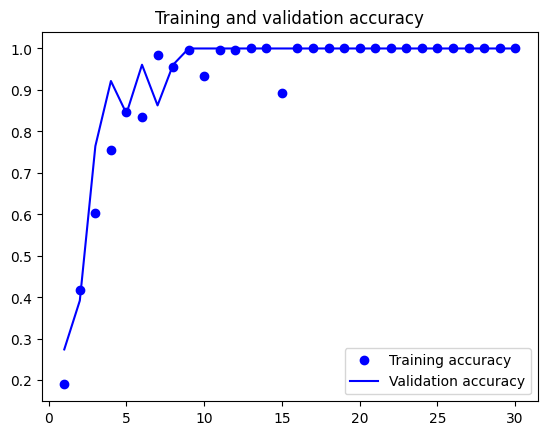

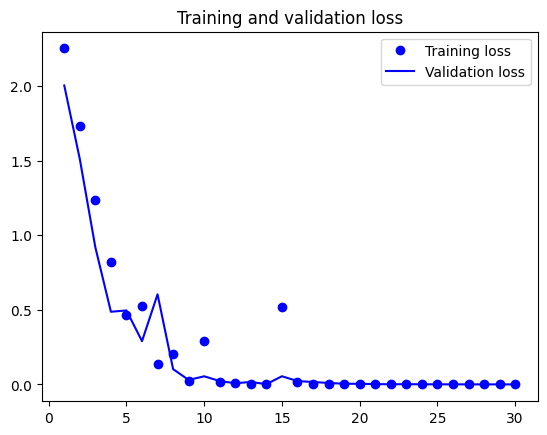

In [6]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [8]:
test_model = keras.models.load_model("model.keras")
test_loss, test_acc = test_model.evaluate(test_data_X, test_data_y)
print(f"Test accuracy: {test_acc:.3f}")

OSError: No file or directory found at model.keras